In [176]:
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime
import os
import dask.dataframe as dd
import calendar
from datetime import datetime, timedelta

from geopandas.tools import sjoin

import warnings
warnings.filterwarnings('ignore')

In [177]:
nta_url = 'https://data.cityofnewyork.us/resource/q2z5-ai38.json'

query = (nta_url+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())


for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
nta = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
nta = nta.drop(columns = ['the_geom'])
nta.head()

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,2,Bronx,005,BX28,Van Cortlandt Village,21945.719299,25666124.5948,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
2,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."
3,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ..."
4,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."


<AxesSubplot:>

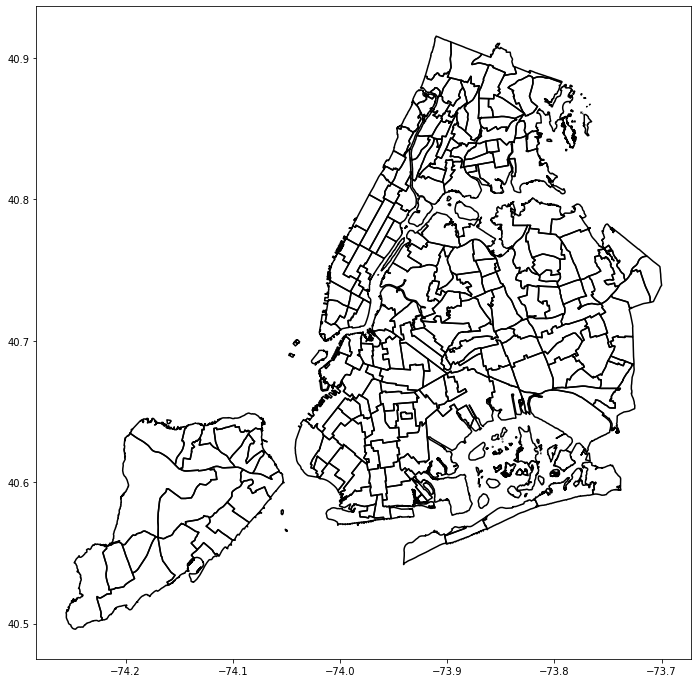

In [178]:
nta_boundary = nta.boundary

# Plot the NTA boundaries
fig, ax = plt.subplots(figsize=(12,12))
nta_boundary.plot(edgecolor='black', ax=ax)

In [179]:
data = pd.read_csv('/Users/ananyarajesh/Downloads/applied_data_science_final_project-main 4/Data/predictions.csv')
data

,ntacode,2010/1/1,2010/10/1,2010/11/1,2010/12/1,2010/2/1,2010/3/1,2010/4/1,2010/5/1,2010/6/1,2010/7/1,2010/8/1,2010/9/1,2011/1/1,2011/10/1,2011/11/1,2011/12/1,2011/2/1,2011/3/1,2011/4/1,2011/5/1,2011/6/1,2011/7/1,2011/8/1,2011/9/1,2012/1/1,2012/10/1,2012/11/1,2012/12/1,2012/2/1,2012/3/1,2012/4/1,2012/5/1,2012/6/1,2012/7/1,2012/8/1,2012/9/1,2013/1/1,2013/10/1,2013/11/1,2013/12/1,2013/2/1,2013/3/1,2013/4/1,2013/5/1,2013/6/1,2013/7/1,2013/8/1,2013/9/1,2014/1/1,2014/10/1,2014/11/1,2014/12/1,2014/2/1,2014/3/1,2014/4/1,2014/5/1,2014/6/1,2014/7/1,2014/8/1,2014/9/1,2015/1/1,2015/10/1,2015/11/1,2015/12/1,2015/2/1,2015/3/1,2015/4/1,2015/5/1,2015/6/1,2015/7/1,2015/8/1,2015/9/1,2016/1/1,2016/10/1,2016/11/1,2016/12/1,2016/2/1,2016/3/1,2016/4/1,2016/5/1,2016/6/1,2016/7/1,2016/8/1,2016/9/1,2017/1/1,2017/10/1,2017/11/1,2017/12/1,2017/2/1,2017/3/1,2017/4/1,2017/5/1,2017/6/1,2017/7/1,2017/8/1,2017/9/1,2018/1/1,2018/10/1,2018/11/1,2018/12/1,2018/2/1,2018/3/1,2018/4/1,2018/5/1,2018/6/1,2018/7/1,2018/8/1,2018/9/1,2019/1/1,2019/10/1,2019/11/1,2019/12/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1,2019/8/1,2019/9/1,2020/1/1,2020/10/1,2020/11/1,2020/12/1,2020/2/1,2020/3/1,2020/4/1,2020/5/1,2020/6/1,2020/7/1,2020/8/1,2020/9/1,2021/1/1,2021/10/1,2021/11/1,2021/12/1,2021/2/1,2021/3/1,2021/4/1,2021/5/1,2021/6/1,2021/7/1,2021/8/1,2021/9/1,2022/1/1,2022/10/1,2022/11/1,2022/12/1,2022/2/1,2022/3/1,2022/4/1,2022/5/1,2022/6/1,2022/7/1,2022/8/1,2022/9/1
0,BK09,697798.551322,428324.203195,990863.745577,752210.790906,780888.990184,725325.215211,828905.269607,816189.519086,796520.710253,802886.642965,750107.905797,759545.218435,610867.299246,639516.966212,840426.849498,748742.744001,903572.915220,819011.118410,573273.548294,780491.734805,953854.344833,888310.238573,791730.969519,664220.384204,643378.202089,836339.815179,578113.427869,745953.975718,801295.381437,652580.986689,695112.999609,801873.370587,881990.304453,852985.903624,791345.685388,913114.931106,746790.245109,745079.600935,927939.887006,763588.417586,832842.680566,800753.726039,800841.458229,925168.711216,858284.136522,960122.888101,727664.543134,922245.365987,739691.920192,1.208531e+06,937669.597260,862331.802997,946352.343416,1.066165e+06,954702.730884,1.073382e+06,1.068505e+06,956886.421571,1.031833e+06,973421.903965,859411.492978,956437.511193,1.056141e+06,986188.629659,858088.907098,890423.708689,710681.329402,993009.799550,1.021281e+06,794829.639878,975383.198477,1.068294e+06,905362.939884,1.133895e+06,1.018099e+06,924189.732311,823645.743388,873498.598876,896360.428416,875722.511490,992822.377934,787502.590090,1.137552e+06,1.201137e+06,854391.098136,949652.892422,913501.198267,1.143601e+06,947423.961314,1.125456e+06,1.080416e+06,1.011749e+06,1.049054e+06,1.012820e+06,1.128733e+06,1.183125e+06,1.043343e+06,830394.136623,870191.933484,961913.074203,9.894499e+05,919599.717389,803539.727533,965870.485593,1.097370e+06,1.301831e+06,1.209751e+06,1.186341e+06,963824.257268,1.084389e+06,784134.914261,973864.616938,1.125710e+06,1.260491e+06,1.079471e+06,1.276498e+06,1.288062e+06,1.294769e+06,1.085032e+06,866221.034035,1.141166e+06,975792.037648,1.176033e+06,1.160399e+06,1.075709e+06,1.254783e+06,1.256678e+06,1.507765e+06,1.177351e+06,1.152052e+06,1.195042e+06,1.205270e+06,1.117363e+06,1.470483e+06,1.246275e+06,1.302788e+06,1.209544e+06,1.236972e+06,1.800000e+06,1.491929e+06,1.429328e+06,1.306130e+06,1.457582e+06,1.484061e+06,1.065920e+06,1.173959e+06,1.228884e+06,1.255000e+06,1.238700e+06,1.165788e+06,1.347127e+06,1.381361e+06,1.267445e+06,9.268022e+05,1.135748e+06,1.341451e+06
1,BK17,389336.692272,449847.513319,409581.327280,239290.293005,417967.157730,284942.093911,305491.312927,395265.002622,420692.785295,342819.155741,395000.418503,345682.215557,459369.573700,369945.875391,399811.738239,405994.738344,388231.077801,382326.709747,400919.496343,415345.392843,391697.737894,388102.855559,343031.658729,435947.412640,408850.307399,330705.531482,367713.926650,380664.771094,417906.568980,453908.103232

In [180]:
data.columns

Index(['ntacode', '2010/1/1', '2010/10/1', '2010/11/1', '2010/12/1',
       '2010/2/1', '2010/3/1', '2010/4/1', '2010/5/1', '2010/6/1',
       ...
       '2022/11/1', '2022/12/1', '2022/2/1', '2022/3/1', '2022/4/1',
       '2022/5/1', '2022/6/1', '2022/7/1', '2022/8/1', '2022/9/1'],
      dtype='object', length=157)

In [181]:
nta['ntacode'].unique()

array(['QN08', 'BX28', 'QN55', 'BK40', 'BK50', 'BX41', 'QN26', 'BK68',
       'BK79', 'QN38', 'QN52', 'BK44', 'QN01', 'BX98', 'QN07', 'QN48',
       'BK77', 'BK41', 'BK75', 'QN33', 'QN44', 'MN06', 'BX07', 'QN62',
       'SI11', 'QN15', 'SI08', 'BX10', 'BX33', 'QN37', 'BX13', 'BK81',
       'BK85', 'QN35', 'SI37', 'QN23', 'QN12', 'QN46', 'QN50', 'BK91',
       'BK95', 'QN66', 'QN41', 'BK09', 'QN54', 'SI12', 'SI28', 'BX43',
       'BK64', 'BX55', 'QN47', 'QN49', 'BK63', 'SI14', 'BX06', 'BK21',
       'BK26', 'BX22', 'QN19', 'BK34', 'BX03', 'BX31', 'QN17', 'QN60',
       'BX29', 'BX30', 'BK27', 'BX05', 'QN22', 'QN51', 'QN02', 'QN76',
       'BX35', 'QN28', 'QN63', 'BK88', 'MN19', 'MN35', 'QN43', 'QN61',
       'MN04', 'MN50', 'BK58', 'BK96', 'MN20', 'BK90', 'BK73', 'BX59',
       'QN10', 'BK17', 'BX26', 'MN23', 'SI45', 'SI36', 'MN36', 'MN34',
       'MN27', 'MN21', 'MN31', 'MN40', 'MN22', 'MN33', 'BK33', 'BK61',
       'BK69', 'QN25', 'BK30', 'BK31', 'BX01', 'BX40', 'BX09', 'BX49',
      

In [182]:
data['ntacode'].unique()

array(['BK09', 'BK17', 'BK19', 'BK21', 'BK23', 'BK25', 'BK26', 'BK27',
       'BK28', 'BK29', 'BK30', 'BK31', 'BK33', 'BK34', 'BK35', 'BK37',
       'BK38', 'BK40', 'BK41', 'BK43', 'BK44', 'BK45', 'BK50', 'BK58',
       'BK61', 'BK63', 'BK64', 'BK68', 'BK69', 'BK72', 'BK73', 'BK75',
       'BK76', 'BK77', 'BK78', 'BK79', 'BK81', 'BK82', 'BK83', 'BK85',
       'BK88', 'BK90', 'BK91', 'BK93', 'BK95', 'BX08', 'BX22', 'BX29',
       'BX37', 'BX44', 'BX46', 'BX52', 'BX55', 'BX62', 'MN03', 'MN11',
       'MN12', 'MN14', 'MN15', 'MN17', 'MN19', 'MN20', 'MN21', 'MN22',
       'MN28', 'MN32', 'MN35', 'MN36', 'MN40', 'QN01', 'QN02', 'QN03',
       'QN05', 'QN06', 'QN07', 'QN08', 'QN10', 'QN12', 'QN15', 'QN17',
       'QN18', 'QN19', 'QN20', 'QN21', 'QN22', 'QN23', 'QN25', 'QN26',
       'QN28', 'QN29', 'QN30', 'QN31', 'QN33', 'QN34', 'QN35', 'QN37',
       'QN42', 'QN43', 'QN44', 'QN46', 'QN47', 'QN48', 'QN49', 'QN50',
       'QN51', 'QN52', 'QN53', 'QN55', 'QN56', 'QN57', 'QN60', 'QN61',
      

In [183]:
df = pd.merge(nta, data, on='ntacode', how='inner')

In [184]:
df

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,2010/1/1,2010/10/1,2010/11/1,2010/12/1,2010/2/1,2010/3/1,2010/4/1,2010/5/1,2010/6/1,2010/7/1,2010/8/1,2010/9/1,2011/1/1,2011/10/1,2011/11/1,2011/12/1,2011/2/1,2011/3/1,2011/4/1,2011/5/1,2011/6/1,2011/7/1,2011/8/1,2011/9/1,2012/1/1,2012/10/1,2012/11/1,2012/12/1,2012/2/1,2012/3/1,2012/4/1,2012/5/1,2012/6/1,2012/7/1,2012/8/1,2012/9/1,2013/1/1,2013/10/1,2013/11/1,2013/12/1,2013/2/1,2013/3/1,2013/4/1,2013/5/1,2013/6/1,2013/7/1,2013/8/1,2013/9/1,2014/1/1,2014/10/1,2014/11/1,2014/12/1,2014/2/1,2014/3/1,2014/4/1,2014/5/1,2014/6/1,2014/7/1,2014/8/1,2014/9/1,2015/1/1,2015/10/1,2015/11/1,2015/12/1,2015/2/1,2015/3/1,2015/4/1,2015/5/1,2015/6/1,2015/7/1,2015/8/1,2015/9/1,2016/1/1,2016/10/1,2016/11/1,2016/12/1,2016/2/1,2016/3/1,2016/4/1,2016/5/1,2016/6/1,2016/7/1,2016/8/1,2016/9/1,2017/1/1,2017/10/1,2017/11/1,2017/12/1,2017/2/1,2017/3/1,2017/4/1,2017/5/1,2017/6/1,2017/7/1,2017/8/1,2017/9/1,2018/1/1,2018/10/1,2018/11/1,2018/12/1,2018/2/1,2018/3/1,2018/4/1,2018/5/1,2018/6/1,2018/7/1,2018/8/1,2018/9/1,2019/1/1,2019/10/1,2019/11/1,2019/12/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1,2019/8/1,2019/9/1,2020/1/1,2020/10/1,2020/11/1,2020/12/1,2020/2/1,2020/3/1,2020/4/1,2020/5/1,2020/6/1,2020/7/1,2020/8/1,2020/9/1,2021/1/1,2021/10/1,2021/11/1,2021/12/1,2021/2/1,2021/3/1,2021/4/1,2021/5/1,2021/6/1,2021/7/1,2021/8/1,2021/9/1,2022/1/1,2022/10/1,2022/11/1,2022/12/1,2022/2/1,2022/3/1,2022/4/1,2022/5/1,2022/6/1,2022/7/1,2022/8/1,2022/9/1
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",285000.000000,300603.780352,328895.983605,306463.031668,345303.382607,282256.115779,347739.798575,321134.342602,345453.494710,287474.377768,304246.990912,353677.234117,326972.654662,290189.671494,322893.240156,293125.748974,332022.037609,286963.544746,297980.127954,211733.797277,278044.001844,279628.455209,206490.640697,324312.279099,314334.707569,260225.435355,258784.753470,345306.214650,313113.131396,327801.742546,320407.270604,318510.190506,284452.691818,286930.855534,322069.519250,325386.414707,336447.546952,352295.735664,352460.799862,375427.879877,340301.940784,337625.687380,333418.008537,284302.152350,356066.852385,293153.896365,345304.875813,360097.716734,353281.276021,323157.731669,361940.763831,358585.861798,404615.975774,369708.067882,335410.186762,347129.136363,364042.673009,368531.886303,399670.467570,379160.611623,341804.936897,328460.430673,349371.352297,361900.331673,333978.221055,369640.193500,311199.095019,370321.409818,371568.204253,336214.742956,379178.344551,389188.391270,370000.000000,419003.139694,415214.221133,405905.209035,345256.654162,364440.799713,375207.097805,3.771545e+05,372364.194249,407258.799396,409343.176872,4.228201e+05,389529.016665,3.974492e+05,4.229764e+05,3.909749e+05,406741.799494,383669.563746,377894.667082,4.364228e+05,386689.515271,441257.269855,4.410765e+05,4.110753e+05,397917.386614,4.923273e+05,470520.442686,495671.217008,404922.008807,4.384706e+05,467500.000000,4.845262e+05,518469.912187,4.780000e+05,4.748357e+05,4.803151e+05,4.565683e+05,4.999665e+05,5.081984e+05,5.271276e+05,4.800000e+05,4.450526e+05,4.480485e+05,4.690037e+05,5.094251e+05,5.404386e+05,5.447924e+05,5.154625e+05,4.863973e+05,5.428160e+05,509765.538011,526158.994671,4.963479e+05,4.993950e+05,554593.706995,5.925334e+05,7.088221e+05,6.174303e+05,508729.117676,5.820940e+05,561146.322933,6.000445e+05,5.731252e+05,5.890535e+05,588781.670274,516654.465676,577916.680710,5.962053e+05,6.445947e+05,6.497999e+05,6.617753e+05,6.763397e+05,5.046268e+05,5.223460e+05,5.372138e+05,566964.779402,5.435362e+05,5.211491e+05,5.539894e+05,6.803706e+05,5.531690e+05,6.124989e+05,5.946294e+05,5.697673e+05
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",369641.851090,335157.585605,404649.337046,357446.079670,388960.371392,380322.579312,380333.179880,346472.379559,294917.8

In [185]:
df.columns

Index(['boro_code', 'boro_name', 'county_fips', 'ntacode', 'ntaname',
       'shape_leng', 'shape_area', 'geometry', '2010/1/1', '2010/10/1',
       ...
       '2022/11/1', '2022/12/1', '2022/2/1', '2022/3/1', '2022/4/1',
       '2022/5/1', '2022/6/1', '2022/7/1', '2022/8/1', '2022/9/1'],
      dtype='object', length=164)

In [186]:
columns = df.iloc[:, 8:].columns.tolist()

In [187]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize values
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

# Choose number of clusters
n_clusters = 5

# Fit K-Means algorithm
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df[columns])

# Assign each observation to a cluster
df['Cluster'] = kmeans.predict(df[columns])

In [188]:
df

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,2010/1/1,2010/10/1,2010/11/1,2010/12/1,2010/2/1,2010/3/1,2010/4/1,2010/5/1,2010/6/1,2010/7/1,2010/8/1,2010/9/1,2011/1/1,2011/10/1,2011/11/1,2011/12/1,2011/2/1,2011/3/1,2011/4/1,2011/5/1,2011/6/1,2011/7/1,2011/8/1,2011/9/1,2012/1/1,2012/10/1,2012/11/1,2012/12/1,2012/2/1,2012/3/1,2012/4/1,2012/5/1,2012/6/1,2012/7/1,2012/8/1,2012/9/1,2013/1/1,2013/10/1,2013/11/1,2013/12/1,2013/2/1,2013/3/1,2013/4/1,2013/5/1,2013/6/1,2013/7/1,2013/8/1,2013/9/1,2014/1/1,2014/10/1,2014/11/1,2014/12/1,2014/2/1,2014/3/1,2014/4/1,2014/5/1,2014/6/1,2014/7/1,2014/8/1,2014/9/1,2015/1/1,2015/10/1,2015/11/1,2015/12/1,2015/2/1,2015/3/1,2015/4/1,2015/5/1,2015/6/1,2015/7/1,2015/8/1,2015/9/1,2016/1/1,2016/10/1,2016/11/1,2016/12/1,2016/2/1,2016/3/1,2016/4/1,2016/5/1,2016/6/1,2016/7/1,2016/8/1,2016/9/1,2017/1/1,2017/10/1,2017/11/1,2017/12/1,2017/2/1,2017/3/1,2017/4/1,2017/5/1,2017/6/1,2017/7/1,2017/8/1,2017/9/1,2018/1/1,2018/10/1,2018/11/1,2018/12/1,2018/2/1,2018/3/1,2018/4/1,2018/5/1,2018/6/1,2018/7/1,2018/8/1,2018/9/1,2019/1/1,2019/10/1,2019/11/1,2019/12/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1,2019/8/1,2019/9/1,2020/1/1,2020/10/1,2020/11/1,2020/12/1,2020/2/1,2020/3/1,2020/4/1,2020/5/1,2020/6/1,2020/7/1,2020/8/1,2020/9/1,2021/1/1,2021/10/1,2021/11/1,2021/12/1,2021/2/1,2021/3/1,2021/4/1,2021/5/1,2021/6/1,2021/7/1,2021/8/1,2021/9/1,2022/1/1,2022/10/1,2022/11/1,2022/12/1,2022/2/1,2022/3/1,2022/4/1,2022/5/1,2022/6/1,2022/7/1,2022/8/1,2022/9/1,Cluster
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",-0.735560,-0.611739,-0.504410,-0.474008,-0.553151,-0.638969,-0.472379,-0.595498,-0.508344,-0.723078,-0.724583,-0.422090,-0.596106,-0.687684,-0.549490,-0.773603,-0.600370,-0.723101,-0.752778,-1.068785,-0.800499,-0.649622,-0.955092,-0.476456,-0.589053,-0.781651,-0.638822,-0.553749,-0.564994,-0.495022,-0.528060,-0.502825,-0.705164,-0.740695,-0.674060,-0.640708,-0.581968,-0.545838,-0.542331,-0.435360,-0.523109,-0.585753,-0.606412,-0.846579,-0.548466,-0.844136,-0.657901,-0.547229,-0.601813,-0.807847,-0.613473,-0.612747,-0.463275,-0.522181,-0.670759,-0.628972,-0.668928,-0.599205,-0.541609,-0.566856,-0.727645,-0.824577,-0.799406,-0.749186,-0.796219,-0.622273,-0.813260,-0.697232,-0.677889,-0.872234,-0.728885,-0.654290,-0.727746,-0.668465,-0.645344,-0.578159,-0.730242,-0.649919,-0.674334,-0.761836,-0.889764,-0.677047,-0.692738,-0.693782,-0.736662,-0.887184,-0.750563,-0.942660,-0.653861,-0.833759,-0.842366,-0.625988,-0.846402,-0.720982,-0.717435,-0.853403,-0.872487,-0.602077,-0.618791,-0.615127,-0.730312,-0.680807,-0.647276,-0.650114,-0.644708,-0.721093,-0.747464,-0.705019,-0.720052,-0.588101,-0.499577,-0.477042,-0.493147,-0.835330,-0.753471,-0.758509,-0.621193,-0.506024,-0.466383,-0.593821,-0.619381,-0.377664,-0.440020,-0.323931,-0.483674,-0.252269,0.012431,-0.338219,-0.082883,-0.116797,-0.261791,-0.377031,-0.254636,-0.694602,-0.556073,-0.539985,-0.084336,-0.682229,-0.446991,-0.552056,-0.442619,-0.415535,-0.312147,-0.405267,-0.744722,-0.703078,-0.600275,-0.449050,-0.574509,-0.665315,-0.502458,-0.244594,-0.634840,-0.503150,-0.492518,-0.528012,0
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",-0.349190,-0.455337,-0.157713,-0.218652,-0.336596,-0.197226,-0.316847,-0.481422,-0.750839,-0.202300,-0.568821,-0.542158,-0.207908,-0.312777,-0.321797,-0.396073,-0.180521,-0.221955,-0.256654,-0.340158,-0.445021,-1.003798,-0.774249,-1.194760,-0.250266,-0.379542,-0.245349,-0.299898,-0.363900,-0.367807,-0.405214,-1.133048,-0.813304,-0.853238,-0.644132,-0.459366,-0.277870,-0.391444,-0.356139,-0.272748,-0.218285,-0.254982,-0.458546,-0.446849,-0.440596,-0.516344,-0.510686,-0.602157,-0.370967,-0.495873,-0.392251,-0.363534,-0.348129,-0.370404,-0.594279,-0.434463,-0.545263,-0.441955,-0.430918,-0.406634,-0.486982,-0.489771,-0.486151,-0.468906,-0.535746,-0.491827,-0.517170,-0.564932,-0

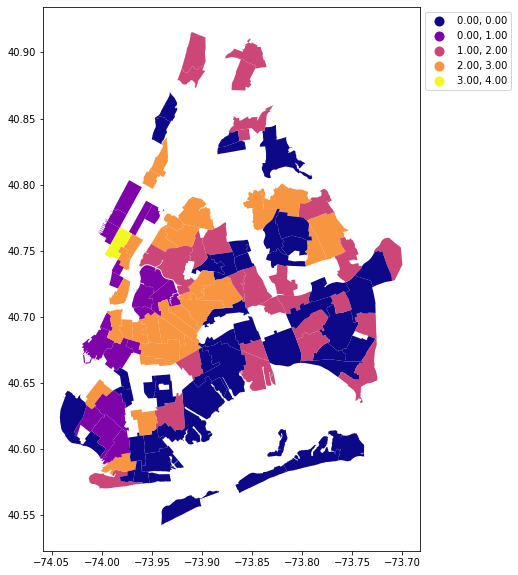

In [189]:
df.plot(column = 'Cluster', k=10, scheme='Quantiles',
         cmap='plasma', markersize=0.01, figsize=(10,10), legend=True,
         missing_kwds={"color": "lightgrey", "edgecolor": "blue",
                       "hatch": "///", "label": "Missing values"},
         legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})

plt.show()

In [190]:
df1 = pd.read_csv('/Users/ananyarajesh/Downloads/applied_data_science_final_project-main 5/Data/gentrification.csv')

In [191]:
gen = df1.loc[:, ['ntacode', 'gentrification']]

In [192]:
gen = pd.merge(nta, gen, on='ntacode', how='inner')

In [193]:
gen

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry,gentrification
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",1
1,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",1
2,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",0
3,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",0
4,4,Queens,081,QN26,North Corona,18429.5400774,18003888.327,"MULTIPOLYGON (((-73.85450 40.75828, -73.85421 ...",1
...,...,...,...,...,...,...,...,...,...
115,1,Manhattan,061,MN28,Lower East Side,26518.5122812,23299597.1538,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",0
116,3,Brooklyn,047,BK35,Stuyvesant Heights,28239.0853295,31407114.0944,"MULTIPOLYGON (((-73.91741 40.68403, -73.91727 ...",0
117,3,Brooklyn,047,BK78,Bushwick South,40735.7458884,40169273.8854,"MULTIPOLYGON (((-73.93230 40.70775, -73.93392 ...",0
118,3,Brooklyn,047,BK83,Cypress Hills-City Line,35564.0581876,27609541.0302,"MULTIPOLYGON (((-73.86335 40.67935, -73.86331 ...",0


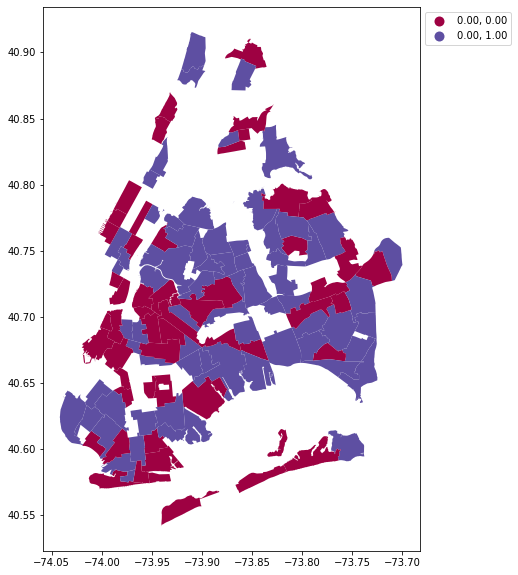

In [194]:
gen.plot(column = 'gentrification', k=10, scheme='Quantiles',
         cmap='Spectral', markersize=0.01, figsize=(10,10), legend=True,
         missing_kwds={"color": "lightgrey", "edgecolor": "blue",
                       "hatch": "///", "label": "Missing values"},
         legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})

plt.show()